In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df= pd.read_csv('new_data.csv')

In [4]:
df

masked_acct    key_1  Vintage  ChargeOffMonthKey  \
0      0001374cd7856b8999ef0b661d515142   ss1239   201708             201811   
1      00060788de8277720911f32a3b355754   ss1241   201501             201704   
2      000c9915e9eb935ee32c691e2f3efb49   ss1243   201711             201807   
3      0031690a89912e70c2abe27684a817dc   ss1245   201709             201812   
4      003847952f99d78e7ce971e49ef2e143   ss1247   201507             201605   
...                                 ...      ...      ...                ...   
13713  f72faf379ed92835e0c2c6ed1f72824b  ss14489   201504             201608   
13714  f7424304da72ea425a4562b8d04e07d4  ss14491   201504             201710   
13715  f7556398c2fdce3f11a8904b70925a41  ss14493   201512             201706   
13716  f75b280e5ebb9cdb902dc407993a1fda  ss14495   201509             201701   
13717  f765edb8cc2ac466fe6d9af06ea743f2  ss14497   201603             201808   

       ChargeOffMOB        Loss_Date_150  BalanceAtDefault  JointIndicator  \
0                15  2018-11-05 00:00:00           9914.12               0   
1                27  2017-04-26 00:00:00           8484.37               0   
2                 8  2018-07-26 00:00:00          14905.78               0   
3                15  2018-12-27 00:00:00          13260.44               0   
4                10  2016-05-14 00:00:00          20073.82               1   
...             ...                  ...               ...             ...   
13713            16  2016-08-18 00:00:00          26926.04               1   
13714            30  2017-10-27 00:00:00          20529.44               0   
13715            18  2017-06-20 00:00:00          10753.38               0   
13716            16  2017-01-24 00:00:00          15726.56               1   
13717            29  2018-08-20 00:00:00           9937.34               0   

       LCPIndicator  FICOScore  ...  \
0                 1      535.0  ...   
1                 0      534.0  ...   
2                 0      495.0  ...   
3                 0        NaN  ...   
4                 0        NaN  ...   
...             ...        ...  ...   
13713             0        NaN  ...   
13714             0      558.0  ...   
13715             0      511.0  ...   
13716             0        NaN  ...   
13717             0      513.0  ...   

      NumExceptionPctAvgNumExceptionLast30DaysBookedLoans  \
0                                                 1.1903    
1                                                 0.0000    
2                                                 0.0000    
3                                                 0.0000    
4                                                 0.0000    
...                                                  ...    
13713                                             0.0000    
13714                                             2.1409    
13715                                             0.0000    
13716                                             0.0000    
13717                                             1.9900    

       NumPriorCrescentApplications  NumPriorCrescentApplicationsLast30Days  \
0                                 0                                       0   
1                                 0                                       0   
2                                 1                                       0   
3                                 0                                       0   
4                                 3                                       1   
...                             ...                                     ...   
13713                             2                                       0   
13714                             0                                       0   
13715                             0                                       0   
13716                             2                                       0   
13717                             2                        

In [5]:
# removing unrequired features

In [6]:
df['Loss_Date_150']=pd.to_datetime(df['Loss_Date_150'])

In [7]:
df['NumJobsApplicant'].value_counts().unique

<bound method Series.unique of 1    13718
Name: NumJobsApplicant, dtype: int64>

In [8]:
df.drop(columns=['ChargeOffMonthKey','key_1','masked_acct','Vintage','masked_acct:1','key_2:1','key_2','key_1:1','key_1'], inplace=True)

In [9]:
df.drop(columns=['StateApplicant','NumJobsApplicant','VehicleMakeNADA','VehicleModelNADA'],inplace= True)
#df.drop(columns=['BackendType','EmploymentJobTypeApplicant'], inplace=True)

In [10]:
df

ChargeOffMOB Loss_Date_150  BalanceAtDefault  JointIndicator  \
0                15    2018-11-05           9914.12               0   
1                27    2017-04-26           8484.37               0   
2                 8    2018-07-26          14905.78               0   
3                15    2018-12-27          13260.44               0   
4                10    2016-05-14          20073.82               1   
...             ...           ...               ...             ...   
13713            16    2016-08-18          26926.04               1   
13714            30    2017-10-27          20529.44               0   
13715            18    2017-06-20          10753.38               0   
13716            16    2017-01-24          15726.56               1   
13717            29    2018-08-20           9937.34               0   

       LCPIndicator  FICOScore  FICOScorePctAvgFICOLast30DaysBookedLoans  \
0                 1      535.0                                    1.0203   
1                 0      534.0                                    0.9808   
2                 0      495.0                                    0.9435   
3                 0        NaN                                       NaN   
4                 0        NaN                                       NaN   
...             ...        ...                                       ...   
13713             0        NaN                                       NaN   
13714             0      558.0                                    1.0236   
13715             0      511.0                                    0.9722   
13716             0        NaN                                       NaN   
13717             0      513.0                                    0.9932   

       ApplicationWeekday  NewUsedIndicator  VehicleManufacturerRebate  ...  \
0                       4                 0                        0.0  ...   
1                       6                 0                        0.0  ...   
2                       4                 1                     2000.0  ...   
3                       6                 0                        0.0  ...   
4                       5                 1                        0.0  ...   
...                   ...               ...                        ...  ...   
13713                   2                 1                     1400.0  ...   
13714                   7                 0                        0.0  ...   
13715                   5                 0                        0.0  ...   
13716                   7                 0                        0.0  ...   
13717                   1                 0                        0.0  ...   

       NumExceptionDTI  NumExceptionPctAvgNumExceptionLast30DaysBookedLoans  \
0                    0                                             1.1903     
1                    0                                             0.0000     
2                    0                                             0.0000     
3                    0                                             0.0000     
4                    0                                             0.0000     
...                ...                                                ...     
13713                0                                             0.0000     
13714                0                                             2.1409     
13715                0                                             0.0000     
13716                0                                             0.0000     
13717                0                                             1.9900     

       NumPriorCrescentApplications  NumPriorCrescentApplicationsLast30Days  \
0                                 0                                       0   
1                                 0                                       0   
2                                 1                                       0   
3                          

In [11]:
df.describe(include='object')

BackendType EmploymentJobTypeApplicant
count        13718                      13718
unique           4                          7
top     BackendGAP                   EMPLOYED
freq          4220                      12159

In [12]:
# one-hot encoding the only two categorical variables

In [13]:
df= pd.get_dummies(df, drop_first= True)

In [14]:
#filling null values using KNN Imputer

In [15]:
from sklearn.impute import KNNImputer

In [16]:
knn = KNNImputer(n_neighbors=5)

In [17]:
knn.fit(df.drop(columns='Loss_Date_150'))
data = pd.DataFrame(knn.transform(df.drop(columns='Loss_Date_150')))
data.columns = df.drop(columns='Loss_Date_150').columns
data.index = df.drop(columns='Loss_Date_150').index

In [18]:
data

ChargeOffMOB  BalanceAtDefault  JointIndicator  LCPIndicator  \
0              15.0           9914.12             0.0           1.0   
1              27.0           8484.37             0.0           0.0   
2               8.0          14905.78             0.0           0.0   
3              15.0          13260.44             0.0           0.0   
4              10.0          20073.82             1.0           0.0   
...             ...               ...             ...           ...   
13713          16.0          26926.04             1.0           0.0   
13714          30.0          20529.44             0.0           0.0   
13715          18.0          10753.38             0.0           0.0   
13716          16.0          15726.56             1.0           0.0   
13717          29.0           9937.34             0.0           0.0   

       FICOScore  FICOScorePctAvgFICOLast30DaysBookedLoans  \
0          535.0                                   1.02030   
1          534.0                                   0.98080   
2          495.0                                   0.94350   
3          537.4                                   1.01914   
4          469.2                                   0.87920   
...          ...                                       ...   
13713      497.4                                   0.94450   
13714      558.0                                   1.02360   
13715      511.0                                   0.97220   
13716      540.6                                   1.02910   
13717      513.0                                   0.99320   

       ApplicationWeekday  NewUsedIndicator  VehicleManufacturerRebate  \
0                     4.0               0.0                        0.0   
1                     6.0               0.0                        0.0   
2                     4.0               1.0                     2000.0   
3                     6.0               0.0                        0.0   
4                     5.0               1.0                        0.0   
...                   ...               ...                        ...   
13713                 2.0               1.0                     1400.0   
13714                 7.0               0.0                        0.0   
13715                 5.0               0.0                        0.0   
13716                 7.0               0.0                        0.0   
13717                 1.0               0.0                        0.0   

       VehicleAge  ...  recovery_rate  BackendType_BackendGapAndWarranty  \
0             5.0  ...         0.1856                                0.0   
1             2.0  ...         0.0000                                0.0   
2             0.0  ...         0.5889                                0.0   
3             3.0  ...         0.3246                                0.0   
4             0.0  ...         0.9667                                0.0   
...           ...  ...            ...                                ...   
13713        -1.0  ...         0.7853                                1.0   
13714         1.0  ...         0.3960                                1.0   
13715         1.0  ...         0.4994                                0.0   
13716         2.0  ...         0.4919                                0.0   
13717         5.0  ...         0.5004                                0.0   

       BackendType_BackendNone  BackendType_BackendWarranty  \
0                          0.0                          1.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          1.0                          0.0   
...                        ...                          ...   
13713                      0.0                          0.0   
13714                      0.0                          0.0   
13715                      0.0          

In [19]:
# checking colinearity of features with target variable

<AxesSubplot:title={'center':'Correlations with Recovery Rate'}>

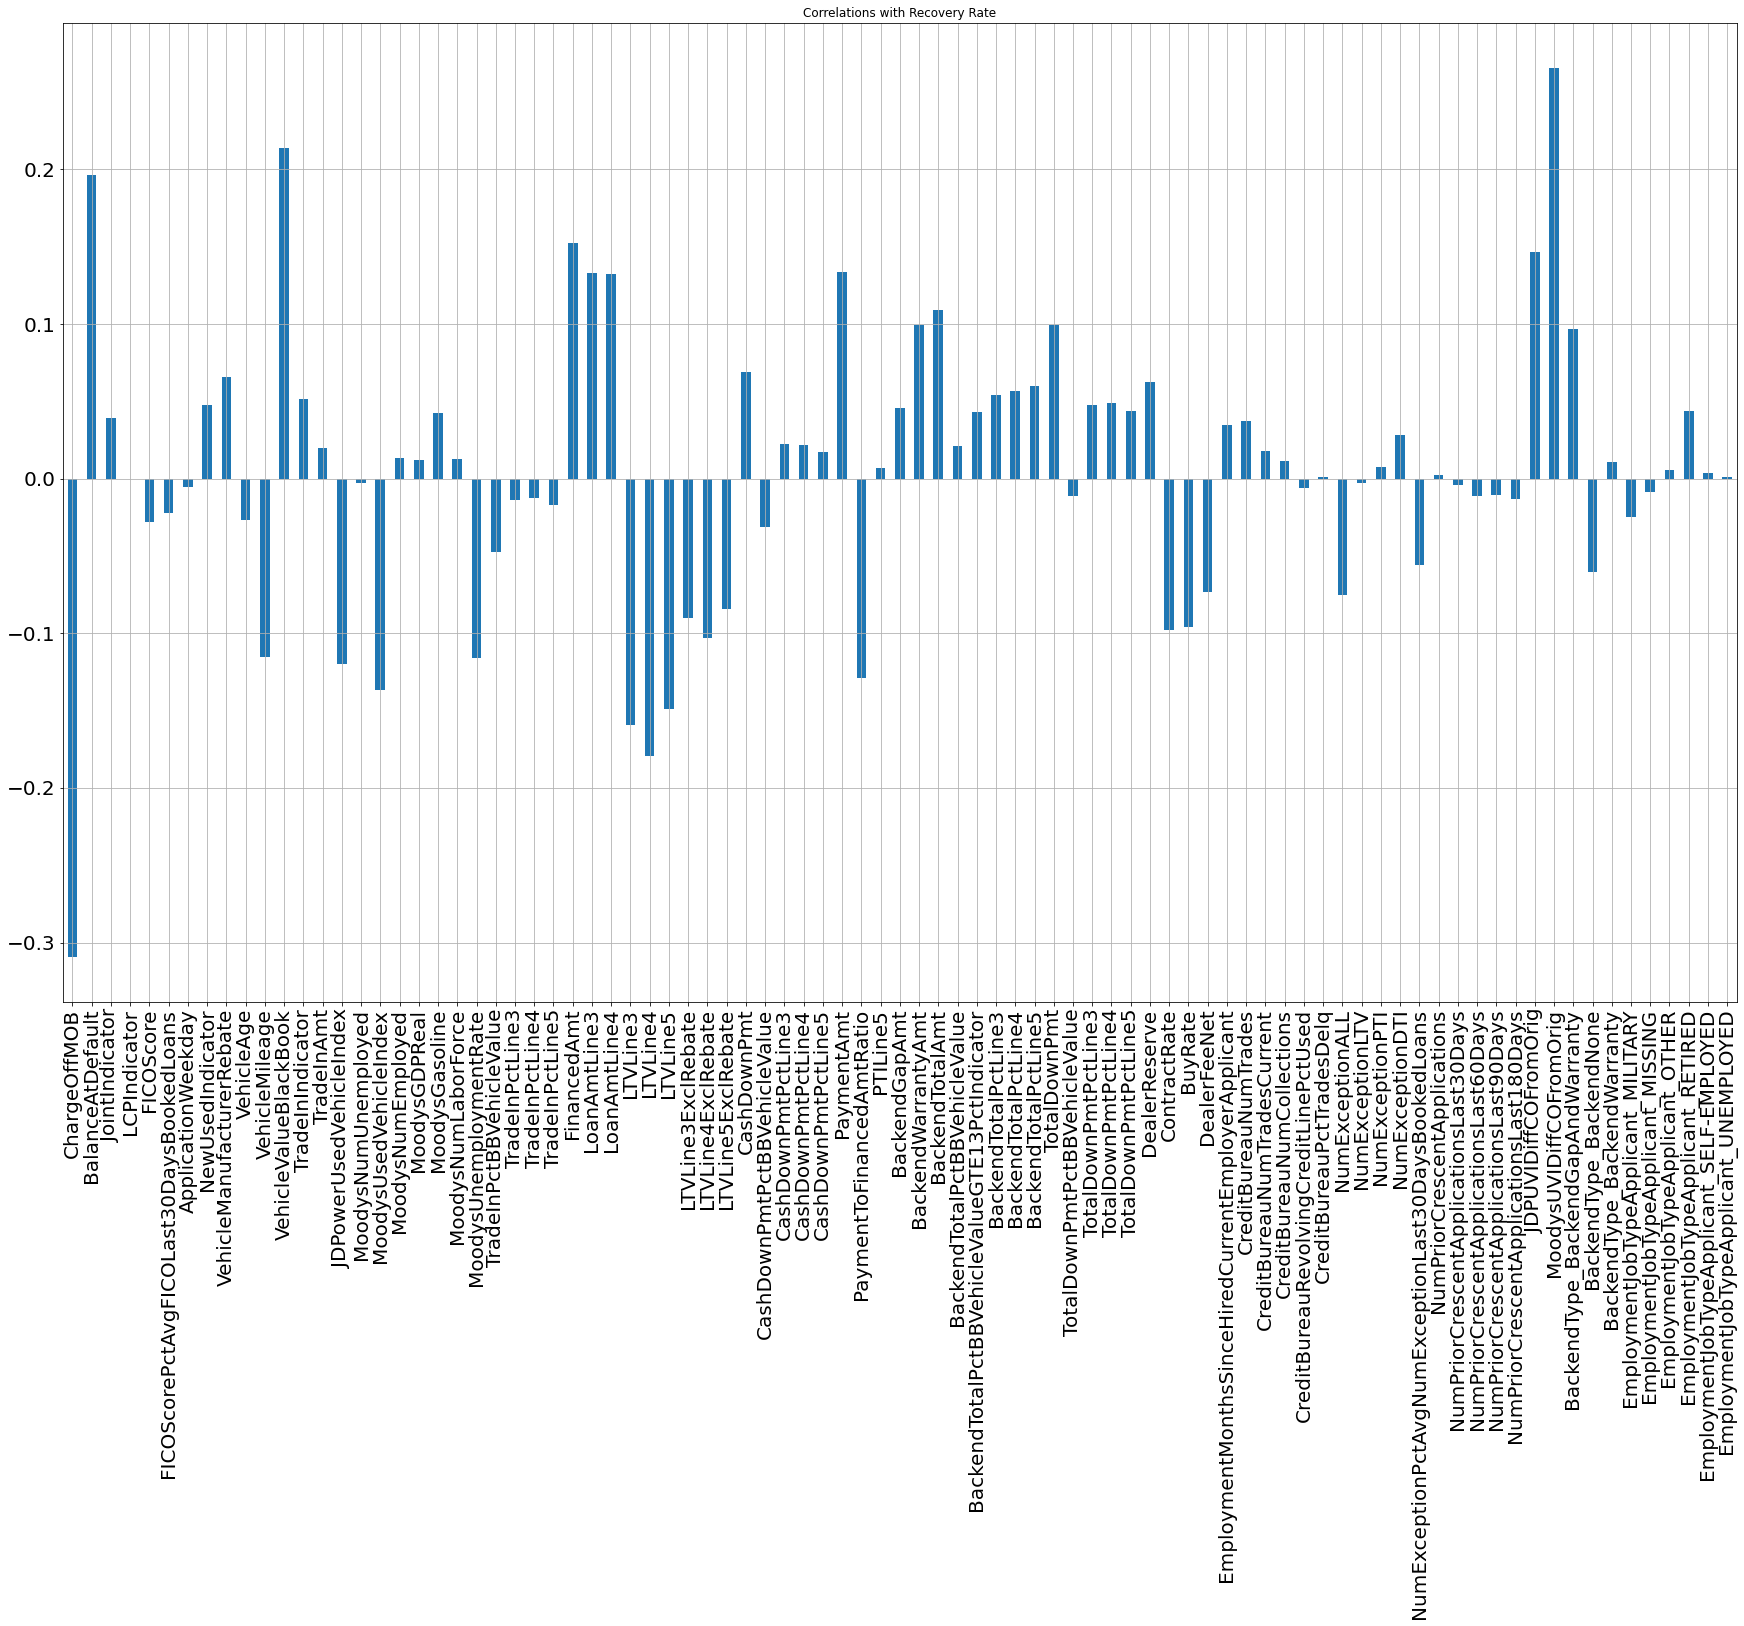

In [20]:
data.drop(columns= 'recovery_rate').corrwith(data['recovery_rate']).plot.bar(figsize=(30,18), fontsize=20, rot=90, title='Correlations with Recovery Rate', grid= True)

In [21]:
# checking correlation between features

In [22]:
corr= data.drop(columns=['recovery_rate']).corr()

<AxesSubplot:>

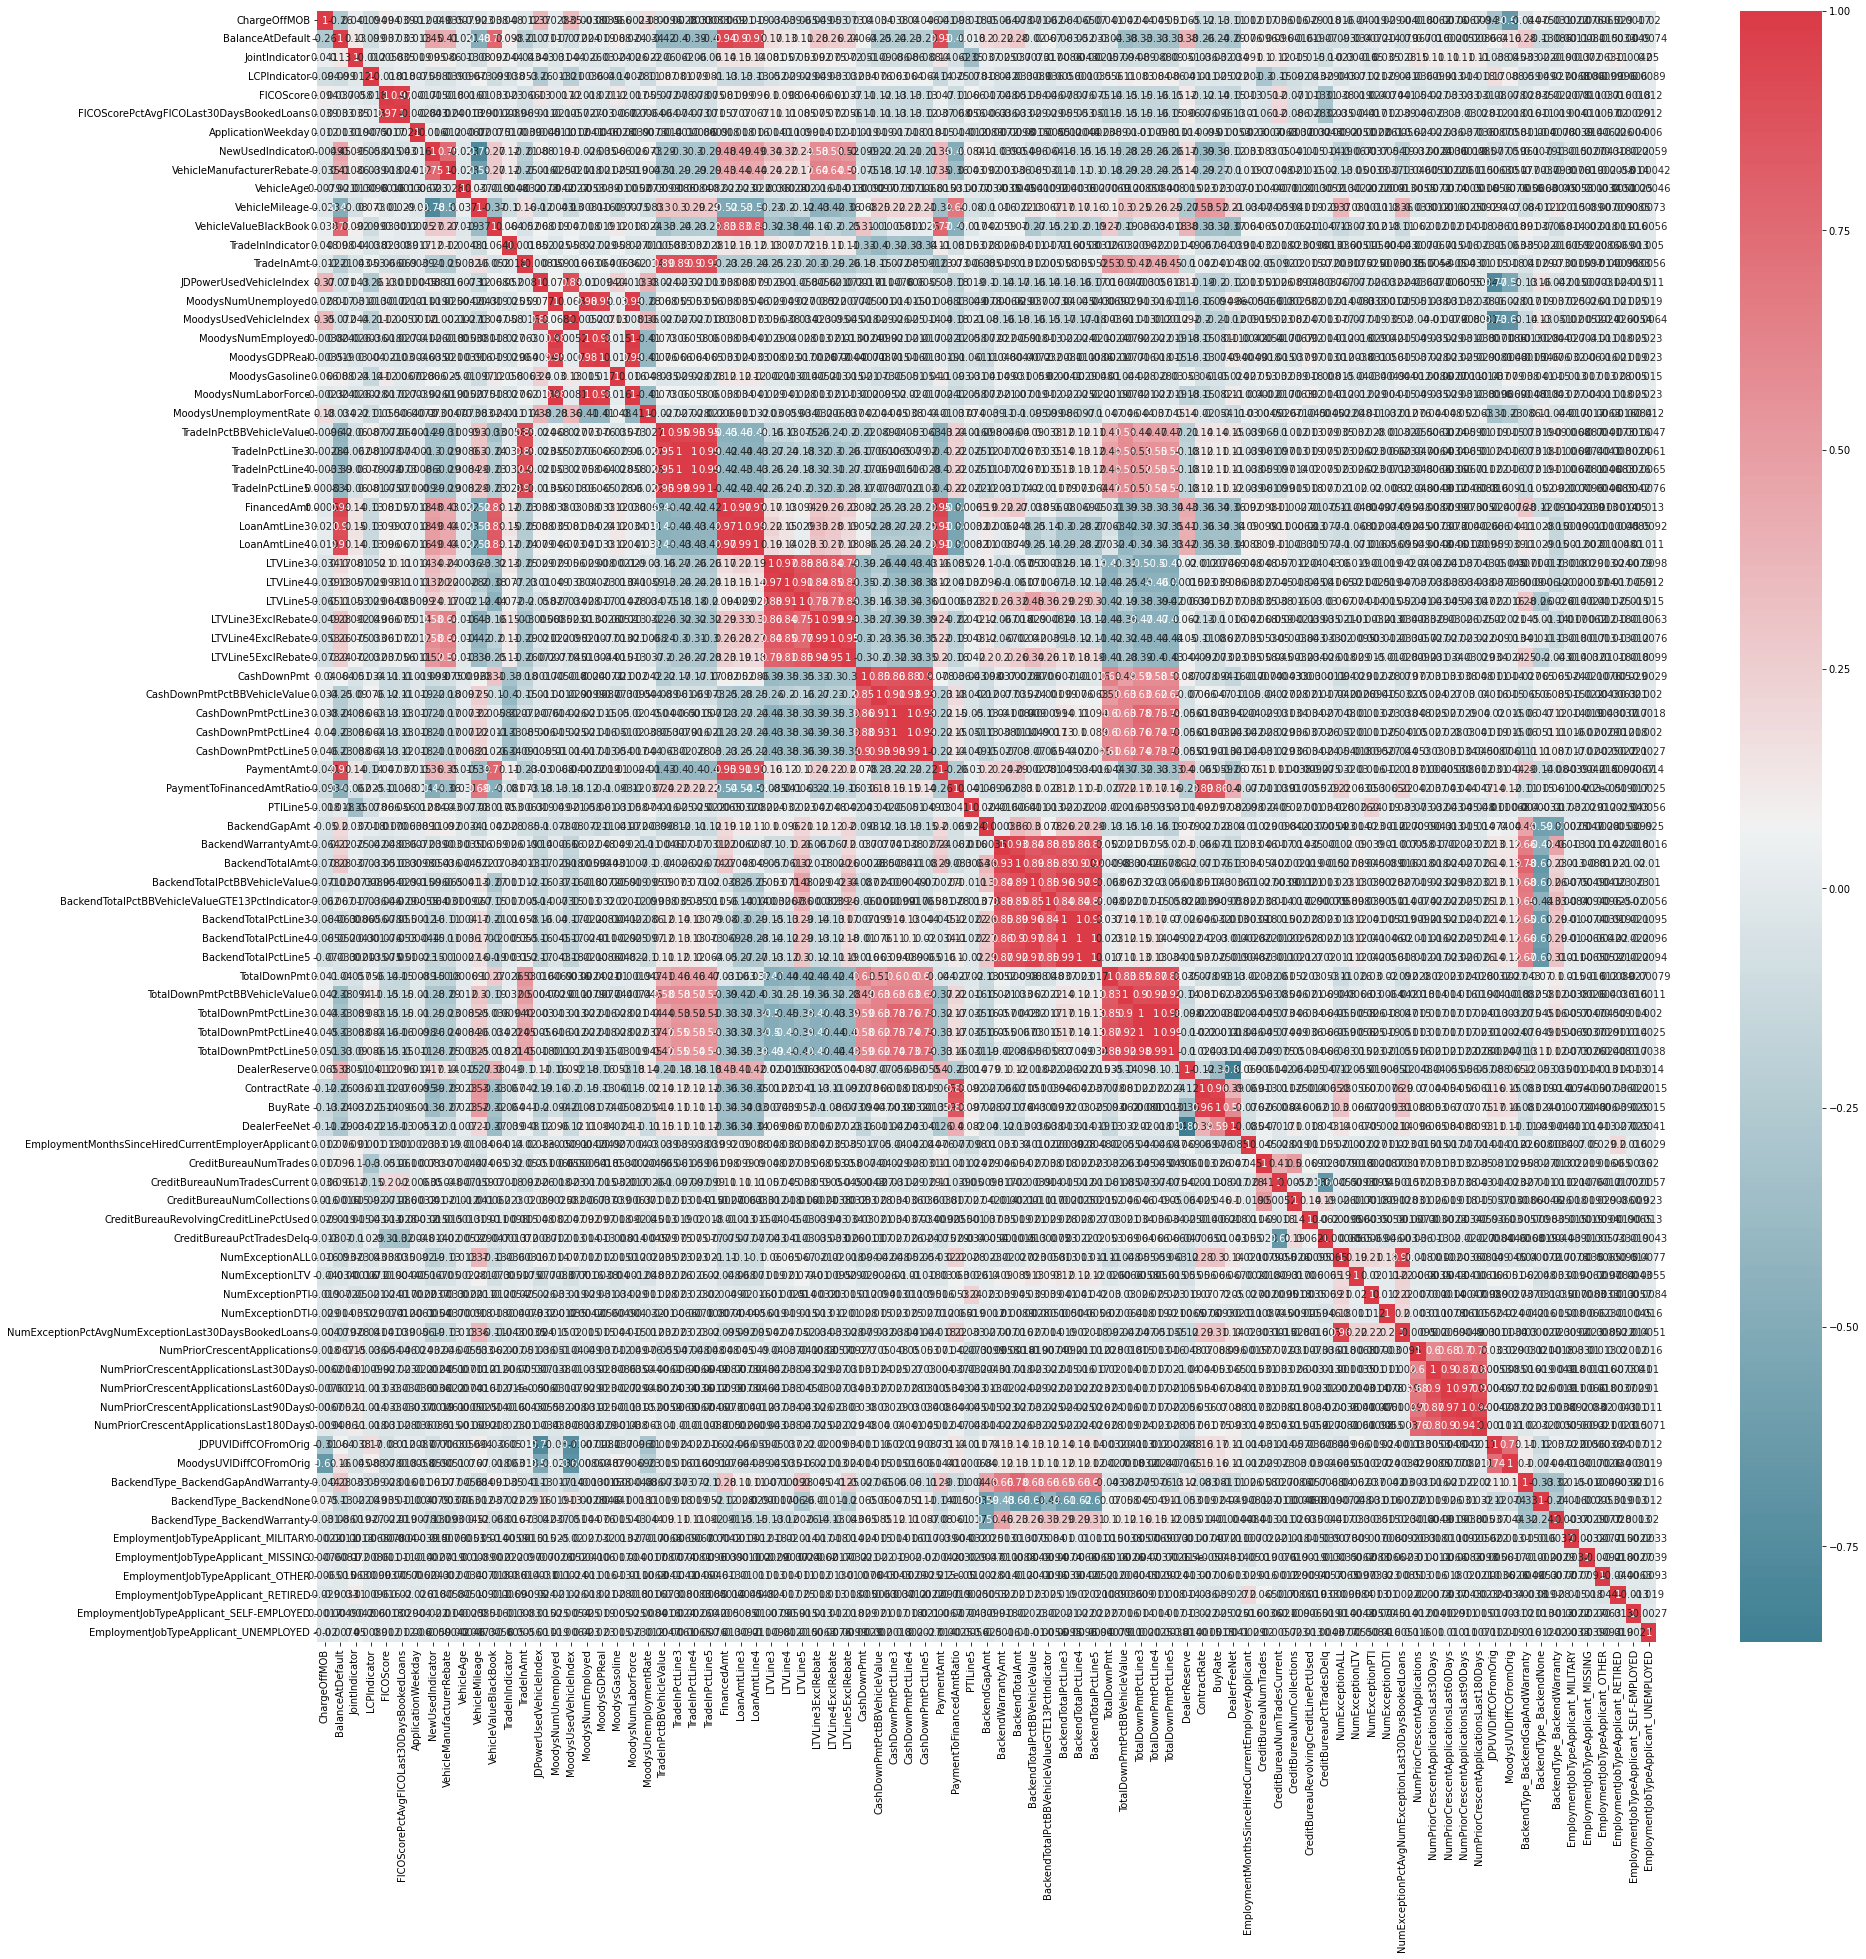

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot= True, cmap= sns.diverging_palette(220,10, as_cmap= True) )

# Feature selection using p-value 

In [24]:
# Removing features based on their p-values, i.e. removing features which don't contribute to target variable

In [25]:
selected_columns = data.drop(columns=['recovery_rate']).columns

In [26]:
selected_columns

Index(['ChargeOffMOB', 'BalanceAtDefault', 'JointIndicator', 'LCPIndicator',
       'FICOScore', 'FICOScorePctAvgFICOLast30DaysBookedLoans',
       'ApplicationWeekday', 'NewUsedIndicator', 'VehicleManufacturerRebate',
       'VehicleAge', 'VehicleMileage', 'VehicleValueBlackBook',
       'TradeInIndicator', 'TradeInAmt', 'JDPowerUsedVehicleIndex',
       'MoodysNumUnemployed', 'MoodysUsedVehicleIndex', 'MoodysNumEmployed',
       'MoodysGDPReal', 'MoodysGasoline', 'MoodysNumLaborForce',
       'MoodysUnemploymentRate', 'TradeInPctBBVehicleValue', 'TradeInPctLine3',
       'TradeInPctLine4', 'TradeInPctLine5', 'FinancedAmt', 'LoanAmtLine3',
       'LoanAmtLine4', 'LTVLine3', 'LTVLine4', 'LTVLine5',
       'LTVLine3ExclRebate', 'LTVLine4ExclRebate', 'LTVLine5ExclRebate',
       'CashDownPmt', 'CashDownPmtPctBBVehicleValue', 'CashDownPmtPctLine3',
       'CashDownPmtPctLine4', 'CashDownPmtPctLine5', 'PaymentAmt',
       'PaymentToFinancedAmtRatio', 'PTILine5', 'BackendGapAmt',
       'Ba

In [27]:
import statsmodels.api as sm

In [28]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [29]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.drop(columns=['recovery_rate']).iloc[:,0:].values, data.iloc[:,78].values, SL, selected_columns)

In [30]:
len(selected_columns)

35

In [31]:
new_data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [32]:
new_data # with 35 columns

ChargeOffMOB  BalanceAtDefault  JointIndicator  NewUsedIndicator  \
0              15.0           9914.12             0.0               0.0   
1              27.0           8484.37             0.0               0.0   
2               8.0          14905.78             0.0               1.0   
3              15.0          13260.44             0.0               0.0   
4              10.0          20073.82             1.0               1.0   
...             ...               ...             ...               ...   
13713          16.0          26926.04             1.0               1.0   
13714          30.0          20529.44             0.0               0.0   
13715          18.0          10753.38             0.0               0.0   
13716          16.0          15726.56             1.0               0.0   
13717          29.0           9937.34             0.0               0.0   

       VehicleMileage  VehicleValueBlackBook  TradeInIndicator  \
0             22922.0                 6100.0               0.0   
1             55703.0                11225.0               1.0   
2               777.0                10700.0               0.0   
3             34566.0                 9925.0               0.0   
4                18.0                22850.0               0.0   
...               ...                    ...               ...   
13713            10.0                21875.0               1.0   
13714         35900.0                18850.0               0.0   
13715         47504.0                 8450.0               0.0   
13716         17423.0                11475.0               0.0   
13717         65001.0                10925.0               0.0   

       MoodysUsedVehicleIndex  MoodysNumEmployed  MoodysNumLaborForce  ...  \
0                      136.77            2953.37              3065.95  ...   
1                      146.57            9024.72              9593.80  ...   
2                      137.43            4743.23              4956.59  ...   
3                      136.35            3221.82              3341.52  ...   
4                      149.62            2027.72              2165.93  ...   
...                       ...                ...                  ...  ...   
13713                  147.20            9021.09              9566.89  ...   
13714                  147.20           12472.24             13050.35  ...   
13715                  144.76             873.94               934.40  ...   
13716                  148.46            2718.31              2823.94  ...   
13717                  145.84            9128.08              9590.95  ...   

       EmploymentMonthsSinceHiredCurrentEmployerApplicant  \
0                                                  101.0    
1                                                    9.0    
2                                                    7.0    
3                                                  103.0    
4                                                  108.0    
...                                                  ...    
13713                                                0.0    
13714                                                3.0    
13715                                              192.0    
13716                                                3.0    
13717                                                3.0    

       CreditBureauNumTrades  NumExceptionALL  \
0                        5.0              1.0   
1                       10.0              0.0   
2                       14.0              0.0   
3                       13.0              0.0   
4                       56.0              0.0   
...                      ...              ...   
13713                   27.0              0.0   
13714                    9.0              1.0   
13715                   88.0              0.0   
13716                   19.0              0.0   
13717                   28.0              1.0   

       NumExceptionPctAvgNumExceptionLast30DaysBookedL

## Removing correlated features 

In [33]:
#removing features with correlation >0.7 and <-0.7

In [34]:
cor=new_data.corr()

<AxesSubplot:>

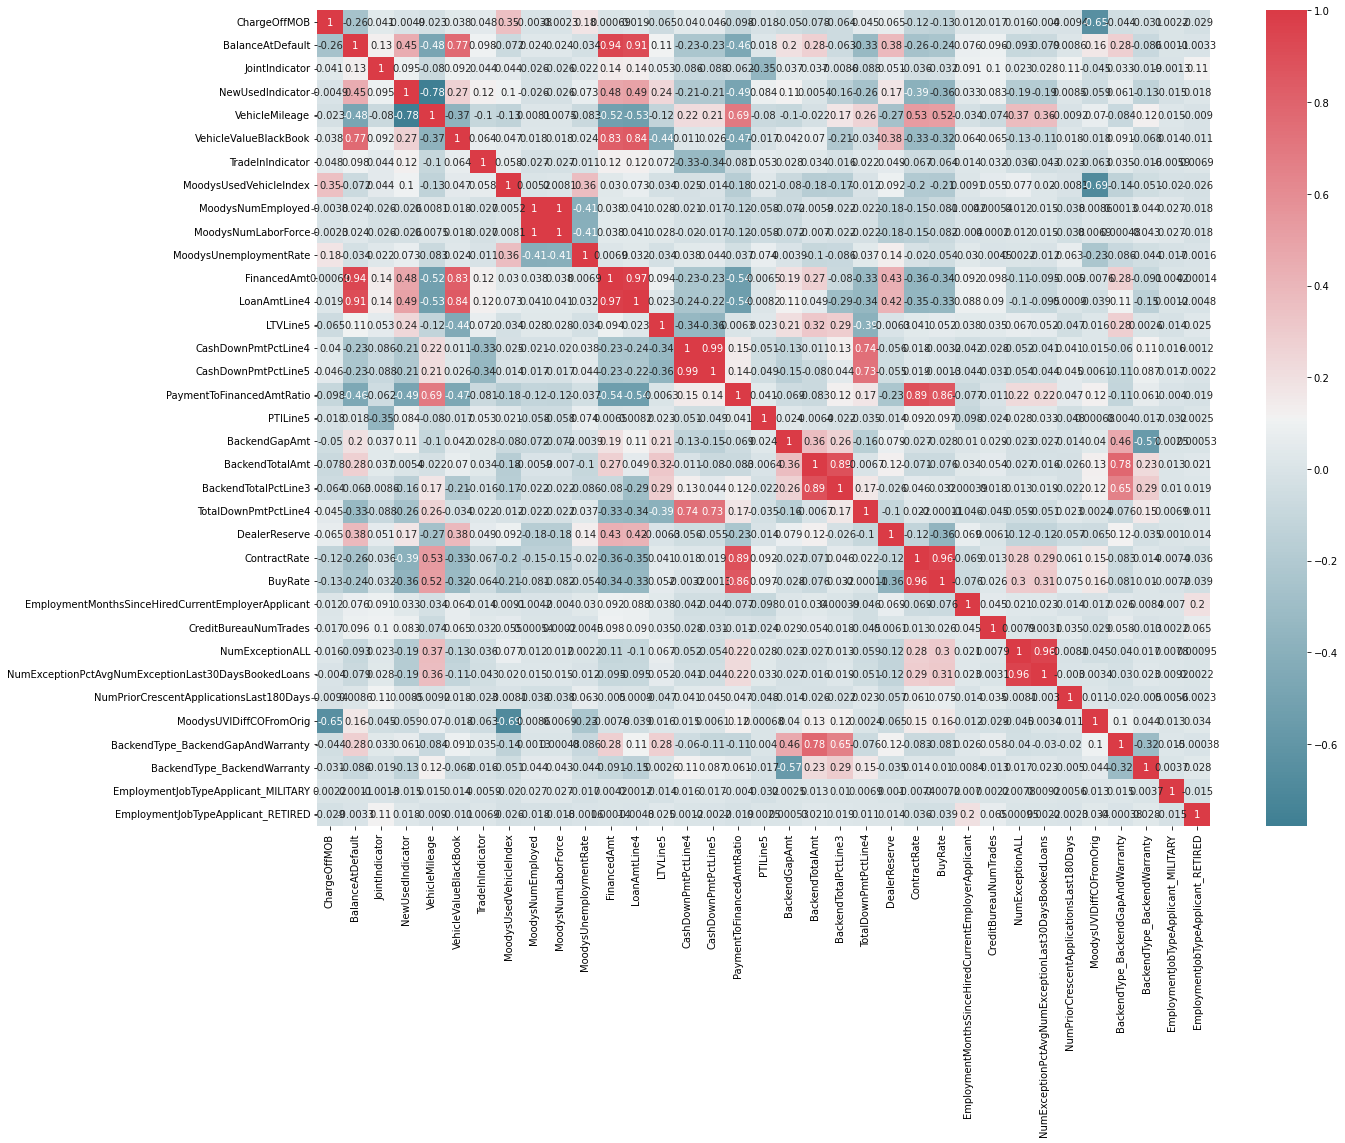

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot= True, cmap= sns.diverging_palette(220,10, as_cmap= True) )

In [35]:
columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if cor.iloc[i,j] >= 0.7 or cor.iloc[i,j] <= -0.7:
            if columns[j]:
                columns[j] = False
selected_columns = new_data.columns[columns]

In [36]:
selected_columns

Index(['ChargeOffMOB', 'BalanceAtDefault', 'JointIndicator',
       'NewUsedIndicator', 'TradeInIndicator', 'MoodysUsedVehicleIndex',
       'MoodysNumEmployed', 'MoodysUnemploymentRate', 'LTVLine5',
       'CashDownPmtPctLine4', 'PaymentToFinancedAmtRatio', 'PTILine5',
       'BackendGapAmt', 'BackendTotalAmt', 'DealerReserve',
       'EmploymentMonthsSinceHiredCurrentEmployerApplicant',
       'CreditBureauNumTrades', 'NumExceptionALL',
       'NumPriorCrescentApplicationsLast180Days', 'MoodysUVIDiffCOFromOrig',
       'BackendType_BackendWarranty', 'EmploymentJobTypeApplicant_MILITARY',
       'EmploymentJobTypeApplicant_RETIRED'],
      dtype='object')

In [37]:
x=new_data[selected_columns]

In [38]:
#log transforming the new dataset to minimize heteroscedasticity

In [39]:
logged_x = np.log(x+100)

In [40]:
logged_x

ChargeOffMOB  BalanceAtDefault  JointIndicator  NewUsedIndicator  \
0          4.744932          9.211751        4.605170          4.605170   
1          4.844187          9.057698        4.605170          4.605170   
2          4.682131          9.616191        4.605170          4.615121   
3          4.744932          9.500053        4.605170          4.605170   
4          4.700480          9.912141        4.615121          4.615121   
...             ...               ...             ...               ...   
13713      4.753590         10.204556        4.615121          4.615121   
13714      4.867534          9.934474        4.605170          4.605170   
13715      4.770685          9.292232        4.605170          4.605170   
13716      4.753590          9.669445        4.615121          4.605170   
13717      4.859812          9.214067        4.605170          4.605170   

       TradeInIndicator  MoodysUsedVehicleIndex  MoodysNumEmployed  \
0              4.605170                5.467089           8.024001   
1              4.615121                5.507646           9.118742   
2              4.605170                5.469873           8.485337   
3              4.605170                5.465314           8.108268   
4              4.605170                5.519940           7.662806   
...                 ...                     ...                ...   
13713          4.615121                5.510198           9.118345   
13714          4.605170                5.510198           9.439246   
13715          4.605170                5.500278           6.881350   
13716          4.605170                5.515282           7.943893   
13717          4.605170                5.504681           9.130006   

       MoodysUnemploymentRate  LTVLine5  CashDownPmtPctLine4  ...  \
0                    4.605537  4.622072             4.606063  ...   
1                    4.605764  4.615315             4.606917  ...   
2                    4.605600  4.619237             4.606011  ...   
3                    4.605528  4.619052             4.606012  ...   
4                    4.605808  4.613970             4.612201  ...   
...                       ...       ...                  ...  ...   
13713                4.605743  4.619120             4.610332  ...   
13714                4.605614  4.617964             4.607005  ...   
13715                4.605817  4.618974             4.606988  ...   
13716                4.605544  4.618921             4.606196  ...   
13717                4.605653  4.618373             4.607263  ...   

       BackendTotalAmt  DealerReserve  \
0             7.649693       6.293216   
1             4.605170       4.605170   
2             6.902743       4.605170   
3             7.649693       6.693733   
4             4.605170       7.003411   
...                ...            ...   
13713         7.968666       7.471739   
13714         7.859413       7.278422   
13715         6.745236       6.460640   
13716         5.991465       6.744683   
13717         5.703782       6.684612   

       EmploymentMonthsSinceHiredCurrentEmployerApplicant  \
0                                               5.303305    
1                                               4.691348    
2                                               4.672829    
3                                               5.313206    
4                                               5.337538    
...                                                  ...    
13713                                           4.605170    
13714                                           4.634729    
13715                                           5.676754    
13716                                           4.634729    
13717                                           4.634729    

       CreditBureauNumTrades  NumExceptionALL  \
0                   4.653960         4.615121   
1                   4.700480         4.605170   
2                   4.736198         4.605170   
3             

In [41]:
logged_x.isna().sum() 

ChargeOffMOB                                          0
BalanceAtDefault                                      0
JointIndicator                                        0
NewUsedIndicator                                      0
TradeInIndicator                                      0
MoodysUsedVehicleIndex                                0
MoodysNumEmployed                                     0
MoodysUnemploymentRate                                0
LTVLine5                                              0
CashDownPmtPctLine4                                   0
PaymentToFinancedAmtRatio                             0
PTILine5                                              0
BackendGapAmt                                         0
BackendTotalAmt                                       0
DealerReserve                                         0
EmploymentMonthsSinceHiredCurrentEmployerApplicant    0
CreditBureauNumTrades                                 0
NumExceptionALL                                 

c:\users\sidy boy!\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sidy boy!\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sidy boy!\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

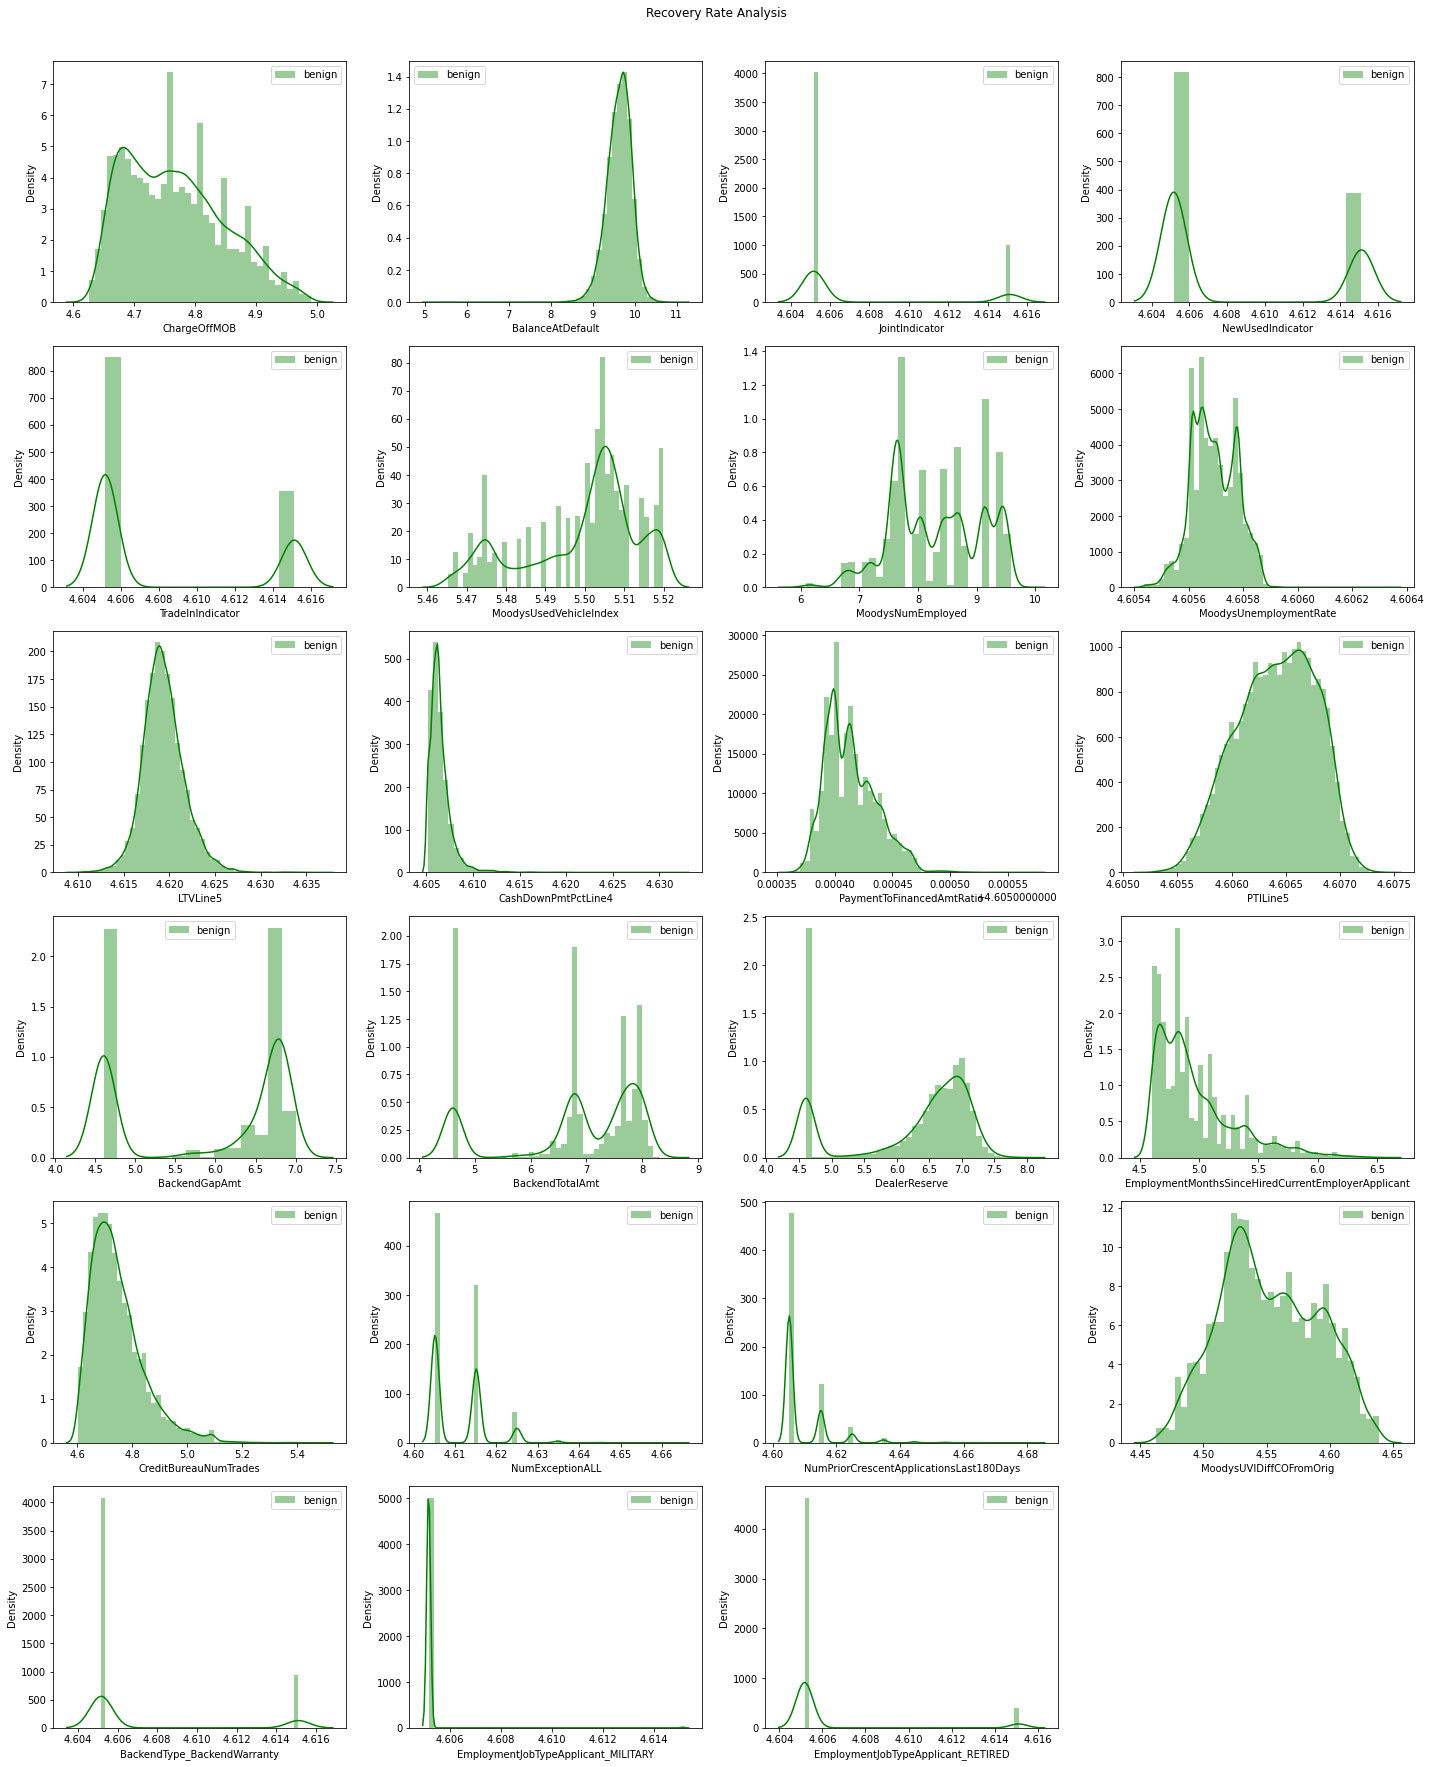

In [42]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in logged_x.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(logged_x[i] ,  color='g', label = 'benign')
    plt.legend(loc='best')
fig.suptitle('Recovery Rate Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [43]:
y=df.recovery_rate

In [44]:
#spliting dataset into train-test and scaling it

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [46]:
x_train,x_test,y_train,y_test= train_test_split(logged_x,y,train_size=.80, random_state=0)

In [47]:
#sc= StandardScaler()

In [48]:
mm= MinMaxScaler()

In [49]:
scaled_x_train= pd.DataFrame(mm.fit_transform(x_train))
scaled_x_test= pd.DataFrame(mm.transform(x_test))

In [50]:
scaled_x_train.columns= x_train.columns.values
scaled_x_test.columns= x_test.columns.values
scaled_x_train.index= x_train.index.values
scaled_x_test.index= x_test.index.values

In [51]:
x_train= scaled_x_train
x_test= scaled_x_test

### Linear Regression 

In [52]:
from sklearn.linear_model import LinearRegression 

In [53]:
model=LinearRegression()

In [54]:
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_test_pred= model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
r2= r2_score(y_test,y_test_pred)

In [59]:
r2

0.16907998680922476

In [60]:
mse= mean_squared_error(y_test,y_test_pred)

In [61]:
mse

0.04327856996435876

In [52]:
rmse= mse**0.5

In [53]:
rmse

0.20803502100453847

In [ ]:
#y_train r2, mse and rmse

In [62]:
y_train_pred= model.predict(x_train)

In [64]:
r2= r2_score(y_train,y_train_pred)

In [65]:
r2

0.19565611979429387

In [66]:
mse= mean_squared_error(y_train,y_train_pred)

In [67]:
mse

0.04349536202109487

In [68]:
rmse=mse**0.5

In [69]:
rmse

0.20855541714636633

In [90]:
import pickle

In [91]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Random Forest 

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model= RandomForestRegressor()

In [72]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [73]:
y_pred= model.predict(x_test)

In [74]:
r2= r2_score(y_test,y_pred)

In [75]:
r2

0.1365689455144925

In [76]:
mse= mean_squared_error(y_test,y_pred)

In [77]:
mse

0.04497191150500255

In [78]:
rmse= mse**0.5

In [79]:
rmse

0.21206581880398018

### SVR 

In [80]:
from sklearn.svm import SVR

In [81]:
model = SVR() # The default kernel used by SVC is the gaussian kernel

In [82]:
model.fit(x_train, y_train)

SVR()

In [83]:
y_pred= model.predict(x_test)

In [84]:
r2= r2_score(y_test,y_pred)

In [85]:
r2

0.143707792842118

In [86]:
mse= mean_squared_error(y_test,y_pred)

In [87]:
mse

0.04460008377353765

In [88]:
rmse= mse**0.5

In [89]:
rmse

0.21118731915893446

## Checking VIF of the features 

In [85]:
df_vif= pd.DataFrame()

In [86]:
#new_data= np.log(new_data + 100)

In [87]:
df_vif['var'] = new_data.columns

In [88]:
#df_vif.drop(labels=(80), axis=0,inplace= True)

In [89]:
X= new_data.assign(const=1)

In [90]:
#X.drop(columns='Loss_Date_150', inplace=True)

In [91]:
X.drop(labels='const', axis=1,inplace= True)

In [92]:
df_vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [93]:
df_vif = df_vif.sort_values(by='vif', ascending= True, ignore_index= False)

In [94]:
df_vif.iloc[0:30,]

var           vif
4                                      VehicleMileage  2.323009e+02
25  EmploymentMonthsSinceHiredCurrentEmployerAppli...  2.407095e+02
22                                      DealerReserve  8.084263e+02
18                                      BackendGapAmt  1.609010e+03
26                              CreditBureauNumTrades  2.563988e+03
19                                    BackendTotalAmt  2.565521e+03
1                                    BalanceAtDefault  8.548930e+03
0                                        ChargeOffMOB  9.013671e+03
30                            MoodysUVIDiffCOFromOrig  4.530680e+04
5                               VehicleValueBlackBook  2.109267e+05
7                              MoodysUsedVehicleIndex  3.640269e+05
29            NumPriorCrescentApplicationsLast180Days  3.943415e+05
6                                    TradeInIndicator  1.492642e+06
28  NumExceptionPctAvgNumExceptionLast30DaysBooked...  1.506634e+06
2                                      JointIndicator  1.663976e+06
34                 EmploymentJobTypeApplicant_RETIRED  3.105424e+06
27                                    NumExceptionALL  6.258822e+06
12                                       LoanAmtLine4  6.411168e+06
11                                        FinancedAmt  6.826029e+06
24                                            BuyRate  7.604241e+06
23                                       ContractRate  8.308134e+06
31                  BackendType_BackendGapAndWarranty  1.647068e+07
3                                    NewUsedIndicator  1.808373e+07
21                               TotalDownPmtPctLine4  4.034009e+07
8                                   MoodysNumEmployed  5.771884e+07
9                                 MoodysNumLaborForce  5.824568e+07
33                EmploymentJobTypeApplicant_MILITARY  7.995022e+07
32                        BackendType_BackendWarranty  8.047644e+07
17                                           PTILine5  2.052540e+08
13                                           LTVLine5  2.392594e+08

In [ ]:
#not continuing with this approach due to high VIFs